In [1]:
import pandas as pd       #Data analysis and Manipulation
from fbprophet import Prophet # Bitcoin Price Prediction

import plotly.offline as py           # create table
import plotly.graph_objs as go        #create candlestick charts             # Importing Plotly
import plotly.express as px           #create Violin plots, pie charts, box plot, scatter plots,line graph, area graph

import plotly.io as pio
pio.renderers.default = 'colab'     # To initialize plotly 

from google.colab import files
files.upload()

Saving results_LSTM.csv to results_LSTM.csv


{'results_LSTM.csv': b',data,y_pred\n0,2018-05-07,9394.634765625\n1,2018-05-08,9188.2861328125\n2,2018-05-09,9305.130859375\n3,2018-05-10,9183.1552734375\n4,2018-05-11,9151.724609375\n5,2018-05-12,9145.9306640625\n6,2018-05-13,9055.4541015625\n7,2018-05-14,9173.12109375\n8,2018-05-15,9406.736328125\n9,2018-05-16,9528.18359375\n10,2018-05-17,9586.5791015625\n11,2018-05-18,9519.2958984375\n12,2018-05-19,9185.4931640625\n13,2018-05-20,9252.25390625\n14,2018-05-21,9091.9521484375\n15,2018-05-22,8909.83203125\n16,2018-05-23,8575.310546875\n17,2018-05-24,8651.2041015625\n18,2018-05-25,8564.91796875\n19,2018-05-26,8559.4521484375\n20,2018-05-27,8631.0556640625\n21,2018-05-28,8382.046875\n22,2018-05-29,8393.494140625\n23,2018-05-30,8262.8466796875\n24,2018-05-31,8307.728515625\n25,2018-06-01,8278.41015625\n26,2018-06-02,8260.6533203125\n27,2018-06-03,7823.7841796875\n28,2018-06-04,7632.5205078125\n29,2018-06-05,7574.31787109375\n30,2018-06-06,7504.89306640625\n31,2018-06-07,7591.1904296875\n32

In [2]:
df = pd.read_csv("results_LSTM.csv")

In [3]:
df

,Unnamed: 0,data,y_pred
0,0,2018-05-07,9394.634766
1,1,2018-05-08,9188.286133
2,2,2018-05-09,9305.130859
3,3,2018-05-10,9183.155273
4,4,2018-05-11,9151.724609
...,...,...,...
857,857,2020-09-10,9992.753906
858,858,2020-09-11,10095.508789
859,859,2020-09-12,10347.419922
860,860,2020-09-13,10323.685547


In [4]:
df.columns

Index(['Unnamed: 0', 'data', 'y_pred'], dtype='object')

In [5]:
df =df.drop(columns= ["Unnamed: 0"])

In [6]:
df

,data,y_pred
0,2018-05-07,9394.634766
1,2018-05-08,9188.286133
2,2018-05-09,9305.130859
3,2018-05-10,9183.155273
4,2018-05-11,9151.724609
...,...,...
857,2020-09-10,9992.753906
858,2020-09-11,10095.508789
859,2020-09-12,10347.419922
860,2020-09-13,10323.685547


In [7]:
prophet_df = df.rename(columns= {'data': "ds", "y_pred": "y"})

In [8]:
prophet_df

,ds,y
0,2018-05-07,9394.634766
1,2018-05-08,9188.286133
2,2018-05-09,9305.130859
3,2018-05-10,9183.155273
4,2018-05-11,9151.724609
...,...,...
857,2020-09-10,9992.753906
858,2020-09-11,10095.508789
859,2020-09-12,10347.419922
860,2020-09-13,10323.685547


In [9]:
# Prophet instance

In [10]:
m = Prophet()

In [11]:
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
# forecast 75 days in the future


In [13]:
future = m.make_future_dataframe(periods= 75)

In [14]:
forecast = m.predict(future)

In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-07,9235.600416,7662.302250,9074.918518,9235.600416,9235.600416,-851.476378,-851.476378,-851.476378,2.564588,2.564588,2.564588,-854.040966,-854.040966,-854.040966,0.0,0.0,0.0,8384.124039
1,2018-05-08,9194.806626,7697.855917,9066.021475,9194.806626,9194.806626,-830.174493,-830.174493,-830.174493,-20.381375,-20.381375,-20.381375,-809.793118,-809.793118,-809.793118,0.0,0.0,0.0,8364.632133
2,2018-05-09,9154.012836,7682.833332,9025.750276,9154.012836,9154.012836,-772.541980,-772.541980,-772.541980,-10.207724,-10.207724,-10.207724,-762.334256,-762.334256,-762.334256,0.0,0.0,0.0,8381.470856
3,2018-05-10,9113.219045,7773.385294,9135.899837,9113.219045,9113.219045,-702.193351,-702.193351,-702.193351,9.623366,9.623366,9.623366,-711.816717,-711.816717,-711.816717,0.0,0.0,0.0,8411.025695
4,2018-05-11,9072.425255,7772.148412,9059.875269,9072.425255,9072.425255,-671.190039,-671.190039,-671.190039,-12.699075,-12.699075,-12.699075,-658.490964,-658.490964,-658.490964,0.0,0.0,0.0,8401.235216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2020-11-24,9400.491708,9037.873490,10926.608890,8808.374459,9891.375938,584.843237,584.843237,584.843237,-20.381375,-20.381375,-20.381375,605.224612,605.224612,605.224612,0.0,0.0,0.0,9985.334944
933,2020-11-25,9402.128860,8960.253082,10751.887236,8798.216781,9910.704926,494.178682,494.178682,494.178682,-10.207724,-10.207724,-10.207724,504.386405,504.386405,504.386405,0.0,0.0,0.0,9896.307542
934,2020-11-26,9403.766013,8872.072266,10773.179964,8787.821033,9924.387966,410.184383,410.184383,410.184383,9.623366,9.623366,9.623366,400.561017,400.561017,400.561017,0.0,0.0,0.0,9813.950396
935,2020-11-27,9405.403165,8812.997433,10615.006223,8773.743784,9942.351885,282.086085,282.086085,282.086085,-12.699075,-12.699075,-12.699075,294.785161,294.785161,294.785161,0.0,0.0,0.0,9687.489251


In [16]:
#yhatlower, yhatupper are bounds for the predictions
# other columns dont matter for example seasonality is irrelevant by empirical reasons in modelling crypto data since are in a phase ascension

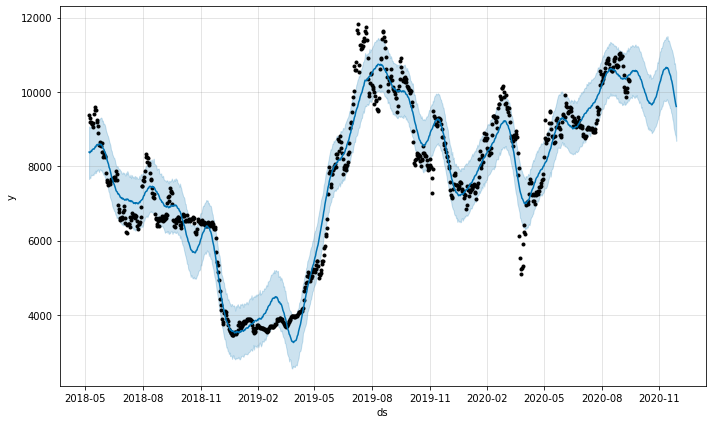

In [17]:
figure = m.plot(forecast, xlabel= "ds", ylabel= 'y')
#black line is actual line and blue is predicted with the model with the yhat lower and upper

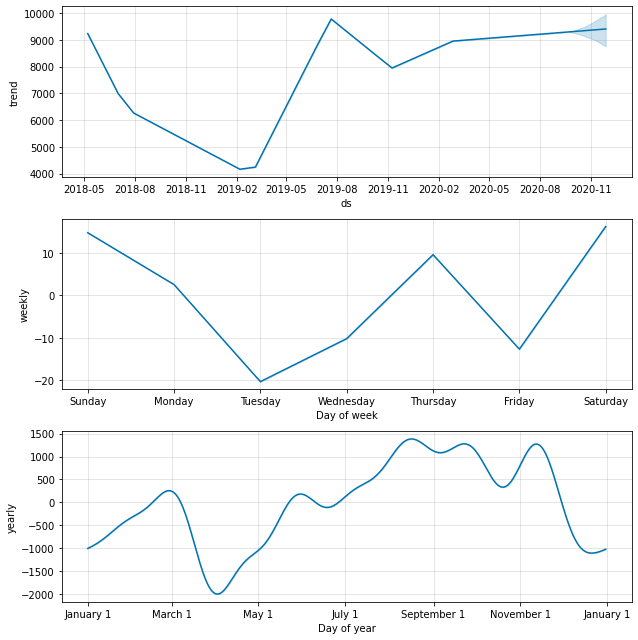

In [18]:
figure2 = m.plot_components(forecast)
# price BTC is upper
# price BTC in average picks in the weekend and has mid lowpick on thursday
#

In [19]:
# Downolading the forecast data

In [20]:
forecast.to_csv("prophet_final_forecast.csv")

In [21]:
from google.colab import files
files.download("prophet_final_forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
files.upload()

Saving confrontation_model_google_finance_data - prophet_versus_actual_closes.csv to confrontation_model_google_finance_data - prophet_versus_actual_closes.csv


{'confrontation_model_google_finance_data - prophet_versus_actual_closes.csv': b'Date,Close,yhat_lower,yhat_upper,yhat\r\n15/09/2020 23:58:00,10783.7,9761.616046,11239.48303,10508.886\r\n16/09/2020 23:58:00,10959.6,9764.155933,11322.6462,10551.71853\r\n17/09/2020 23:58:00,10943.6,9864.905832,11349.28721,10599.13546\r\n18/09/2020 23:58:00,10937.5,9845.615287,11361.52922,10600.13805\r\n19/09/2020 23:58:00,11080,9842.974549,11387.11035,10616.35965\r\n20/09/2020 23:58:00,10920.8,9849.886976,11375.13097,10601.28285\r\n21/09/2020 23:58:00,10414.4,9839.345834,11347.57723,10581.21474\r\n22/09/2020 23:58:00,10532.8,9776.96119,11314.03785,10566.8511\r\n23/09/2020 23:58:00,10235.1,9829.77717,11400.55027,10595.1247\r\n24/09/2020 23:58:00,10740,9908.921878,11371.25331,10625.52478\r\n25/09/2020 23:58:00,10690.5,9856.287521,11376.72583,10607.19615\r\n26/09/2020 23:58:00,10735.6,9825.594696,11315.56826,10601.9568\r\n27/09/2020 23:58:00,10770,9806.415867,11334.71606,10563.51591\r\n28/09/2020 23:58:00,1

In [23]:
data= pd.read_csv("confrontation_model_google_finance_data - prophet_versus_actual_closes.csv")

In [24]:
data

,Date,Close,yhat_lower,yhat_upper,yhat
0,15/09/2020 23:58:00,10783.7,9761.616046,11239.48303,10508.886000
1,16/09/2020 23:58:00,10959.6,9764.155933,11322.64620,10551.718530
2,17/09/2020 23:58:00,10943.6,9864.905832,11349.28721,10599.135460
3,18/09/2020 23:58:00,10937.5,9845.615287,11361.52922,10600.138050
4,19/09/2020 23:58:00,11080.0,9842.974549,11387.11035,10616.359650
...,...,...,...,...,...
70,24/11/2020 23:58:00,19129.3,9015.546048,11054.01876,10043.171910
71,25/11/2020 23:58:00,18769.4,8902.832148,10950.59223,9966.901672
72,26/11/2020 23:58:00,17076.0,8925.410963,10902.00101,9892.443337
73,27/11/2020 23:58:00,17153.9,8852.810247,10799.07003,9770.465141


In [25]:
# CandleStick Charts- Financial data visualization

fig = go.Figure(go.Candlestick(x= data.Date, 
                               open = data.yhat, 
                               high = data.yhat_lower,
                               low = data.yhat_upper,
                               close = data.Close))

In [26]:
fig.show()


In [27]:
data.columns

Index(['Date', 'Close', 'yhat_lower', 'yhat_upper', 'yhat'], dtype='object')

In [33]:
fig = px.line(data, x='Date', y='Close')
fig = px.line(data, x='Date', y='yhat_lower')

fig.show()

In [34]:
df_long=pd.melt(data, id_vars=['Date'], value_vars=['Close', 'yhat_lower', 'yhat_upper', 'yhat'])


In [35]:
fig = px.line(df_long, x='Date', y='value', color='variable')


In [36]:
fig.show()



> ## Conclusion: the predictions of our LSTM model when are used as predictors in the FB Prophet algorithm produce new predictions that are close of the close actual value of the BTC according to Google Finance during a couple days (15 Sept until beg October). After that the actual value takes off much more than the predictions. This can be empirically understood due to the big component of noise in this time series and the recent bubble effect registered with BTC in the crypto space that is steeper than the high derivative of prices in 2017. According to this model this would be a good time to sell.

